# Mobile App User Engagement Analysis with Python

#### Requried libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1) Load Data sets

In [145]:
users = pd.read_excel(r"C:\Users\DELL\Desktop\GPP_task1\GPP_task2\users.xlsx")
sessions = pd.read_excel(r"C:\Users\DELL\Desktop\GPP_task1\GPP_task2\sessions.xlsx")
features = pd.read_excel(r"C:\Users\DELL\Desktop\GPP_task1\GPP_task2\feature_usage.xlsx")

#### 2) Basic information of Data Sets
- Users

In [148]:
users.info()
users.describe()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      5003 non-null   int64         
 1   gender       4747 non-null   object        
 2   age          4952 non-null   float64       
 3   country      4977 non-null   object        
 4   device_type  5003 non-null   object        
 5   platform     5003 non-null   object        
 6   app_version  5003 non-null   object        
 7   is_premium   5003 non-null   bool          
 8   signup_date  4977 non-null   datetime64[ns]
 9   last_active  5003 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 356.8+ KB


,user_id,gender,age,country,device_type,platform,app_version,is_premium,signup_date,last_active
0,1003020,male,33.0,India,Phone,Android,1.3.1,False,2025-02-02 19:03:16.177,2025-03-30 19:03:16.177
1,1002423,female,44.0,India,Tablet,iOS,1.1.0,False,2025-04-07 22:04:24.177,2025-06-15 22:04:24.177
2,1004769,male,26.0,Germany,Phone,Android,1.3.1,False,2025-07-17 19:55:51.177,2025-08-04 19:55:51.177
3,1001432,female,33.0,India,Phone,Android,1.0.0,False,2025-08-09 05:14:47.177,2025-08-15 05:14:47.177
4,1003645,male,36.0,France,Phone,iOS,1.1.0,False,2025-04-12 19:14:48.177,2025-04-23 19:14:48.177


- sessions

In [151]:
sessions.info()
sessions.describe()
sessions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80231 entries, 0 to 80230
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_id              80231 non-null  int64         
 1   user_id                 80231 non-null  int64         
 2   start_time              80231 non-null  datetime64[ns]
 3   end_time                79990 non-null  datetime64[ns]
 4   duration_seconds        80231 non-null  int64         
 5   platform                80231 non-null  object        
 6   os_version              79830 non-null  float64       
 7   app_version             80071 non-null  object        
 8   session_device          80231 non-null  object        
 9   location                80231 non-null  object        
 10  session_index_for_user  80231 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 6.7+ MB


,session_id,user_id,start_time,end_time,duration_seconds,platform,os_version,app_version,session_device,location,session_index_for_user
0,2006560,1000413,2025-10-04 02:48:29.177,2025-10-04 02:48:45.177,16,iOS,14.3,1.1.0,Tablet,Australia,15
1,2045820,1002853,2025-11-25 03:36:15.177,2025-11-25 03:36:29.177,14,Android,10.1,1.2.0,Phone,United States,2
2,2043455,1002703,2025-06-09 12:04:38.177,2025-06-09 12:05:43.177,65,iOS,11.3,1.2.0,Phone,India,14
3,2019669,1001221,2025-04-17 11:48:29.177,2025-04-17 11:48:50.177,21,Android,13.4,1.0.0,Tablet,United Kingdom,19
4,2014703,1000914,2025-12-08 04:33:10.177,2025-12-08 04:33:58.177,48,Android,15.1,1.0.0,Phone,Mexico,3


- features

In [154]:
features.info()
features.describe()
features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251418 entries, 0 to 251417
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event_id          251418 non-null  int64         
 1   user_id           251418 non-null  int64         
 2   session_id        251418 non-null  int64         
 3   feature_name      250915 non-null  object        
 4   event_time        251167 non-null  datetime64[ns]
 5   event_type        251418 non-null  object        
 6   metadata          250664 non-null  object        
 7   duration_seconds  25368 non-null   float64       
 8   value             0 non-null       float64       
 9   error_code        1460 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 19.2+ MB


,event_id,user_id,session_id,feature_name,event_time,event_type,metadata,duration_seconds,value,error_code
0,5004405,1000072,2001173,recommendations,2025-10-07 22:47:55.177,open,"{""network"": ""cellular"", ""app_state"": ""foregrou...",NaN,NaN,NaN
1,5124424,1002495,2040075,search,2025-09-08 00:31:48.177,open,"{""network"": ""wifi"", ""app_state"": ""foreground""}",NaN,NaN,NaN
2,5168199,1003352,2053806,settings,2025-10-11 19:54:31.177,close,"{""network"": ""wifi"", ""app_state"": ""foreground""}",NaN,NaN,NaN
3,5139836,1002771,2044549,home_feed,2025-12-11 15:36:43.177,submit,"{""network"": ""cellular"", ""app_state"": ""foregrou...",NaN,NaN,NaN
4,5162008,1003204,2051457,profile,2025-11-10 02:48:46.177,open,"{""network"": ""cellular"", ""app_state"": ""foregrou...",NaN,NaN,NaN


### 3) Data Quality Assessment

### Data Quality Issues Identified
- Missing values in gender, age, country and signup_date columns
- Duplicate user IDs


In [158]:
users.isnull().sum()

user_id          0
gender         256
age             51
country         26
device_type      0
platform         0
app_version      0
is_premium       0
signup_date     26
last_active      0
dtype: int64

In [160]:
users.duplicated().sum()
users['user_id'].duplicated().sum()

3

In [162]:
users[(users['age'] < 10) | (users['age'] > 100)]

,user_id,gender,age,country,device_type,platform,app_version,is_premium,signup_date,last_active


- no user is aged less than zero and greater than 100

### Group By and Aggregation

In [166]:
users.groupby('gender').size()

gender
female    2244
male      2280
other      223
dtype: int64

In [168]:
gender = users['gender'].value_counts(dropna=False)
device_type = users['device_type'].value_counts(dropna=False)
platform = users['platform'].value_counts(dropna=False)
country = users['country'].value_counts()
app_version = users['app_version'].value_counts()
#check all the values in same format or not
print(gender,device_type,platform,country,app_version)

gender
male      2280
female    2244
NaN        256
other      223
Name: count, dtype: int64 device_type
Phone     4369
Tablet     634
Name: count, dtype: int64 platform
iOS        2715
Android    2288
Name: count, dtype: int64 country
India             1798
United States      722
United Kingdom     387
Brazil             343
Mexico             323
Australia          323
Canada             307
Spain              283
France             247
Germany            244
Name: count, dtype: int64 app_version
1.1.0    1276
1.2.0    1243
1.0.0     995
1.3.1     968
2.0.0     521
Name: count, dtype: int64


-> 256 null values in Gender column of user dataset

In [171]:
pd.crosstab(users['platform'], users['device_type'])

device_type,Phone,Tablet
platform,,
Android,1991,297
iOS,2378,337


In [173]:
users['is_premium'].value_counts(dropna=False)

is_premium
False    4409
True      594
Name: count, dtype: int64

### Date Columns Validity

- Convert to datetime:

In [176]:
users['signup_date'] = pd.to_datetime(users['signup_date'], errors='coerce')
users['last_active'] = pd.to_datetime(users['last_active'], errors='coerce')

- Null value check

In [179]:
users[['signup_date', 'last_active']].isnull().sum()

signup_date    26
last_active     0
dtype: int64

In [181]:
sessions[sessions['duration_seconds'] < 0]

,session_id,user_id,start_time,end_time,duration_seconds,platform,os_version,app_version,session_device,location,session_index_for_user
372,2054476,1003392,2025-07-21 19:46:17.177,2025-07-21 19:46:04.177,-13,iOS,15.4,1.2.0,Phone,Mexico,6
712,2056800,1003537,2025-11-07 15:56:46.177,2025-11-07 15:53:00.177,-226,Android,14.5,1.2.0,Phone,United States,17
1154,2003142,1000195,2025-05-08 21:21:17.177,2025-05-08 21:14:27.177,-410,iOS,11.1,1.1.0,Tablet,Mexico,4
2056,2048869,1003043,2025-08-28 04:54:12.177,2025-08-28 04:53:56.177,-16,iOS,10.1,1.2.0,Phone,India,20
3240,2063352,1003951,2025-11-20 06:18:49.177,2025-11-20 06:17:41.177,-68,Android,15.3,1.2.0,Tablet,Spain,6
...,...,...,...,...,...,...,...,...,...,...,...
77836,2036197,1002246,2025-12-07 15:34:24.177,2025-12-07 15:34:12.177,-12,Android,15.4,1.0.0,Phone,Canada,2
77933,2017083,1001062,2025-12-01 10:07:35.177,2025-12-01 10:06:34.177,-61,iOS,12.4,1.2.0,Phone,Spain,4
77961,2008874,1000551,2025-10-10 03:33:08.177,2025-10-10 03:32:05.177,-63,iOS,12.3,1.3.1,Phone,France,15
78695,2063152,1003937,2025-09-19 06:44:43.177,2025-09-19 06:44:26.177,-17,Android,12.2,1.2.0,Phone,Mexico,16


- check is there any error in signup_date and last_active date for logical check

In [184]:
users[users['last_active'] < users['signup_date']]

,user_id,gender,age,country,device_type,platform,app_version,is_premium,signup_date,last_active


### Remove duplicates and Handling missing values

In [187]:
# Remove duplicates
sessions = sessions.drop_duplicates()
users = users.drop_duplicates()

# # Handle missing categorical values
users.fillna({'gender':'unknown'},inplace=True)
users.fillna({'country':'unknown'},inplace=True)
users.isnull().sum()


user_id         0
gender          0
age            50
country         0
device_type     0
platform        0
app_version     0
is_premium      0
signup_date    25
last_active     0
dtype: int64

## Exploratory Data Analysis (EDA)
- Engagement Metrics (DAU / WAU)

In [190]:
sessions['start_time'] = pd.to_datetime(sessions['start_time'])
sessions['date'] = sessions['start_time'].dt.date
sessions['week'] = sessions['start_time'].dt.to_period('W')

# Daily Active Users
dau = sessions.groupby('date')['user_id'].nunique()
print("Daily active users")
print(dau)
# Weekly Active Users
wau = sessions.groupby('week')['user_id'].nunique()
print("Weekly active users")
print(wau)

Daily active users
date
2024-12-12      1
2024-12-14      1
2024-12-16      2
2024-12-17      6
2024-12-18      9
             ... 
2025-12-09    731
2025-12-10    748
2025-12-11    782
2025-12-12    502
2026-01-11     64
Name: user_id, Length: 365, dtype: int64
Weekly active users
week
2024-12-09/2024-12-15       2
2024-12-16/2024-12-22      32
2024-12-23/2024-12-29      50
2024-12-30/2025-01-05      85
2025-01-06/2025-01-12     109
2025-01-13/2025-01-19     147
2025-01-20/2025-01-26     165
2025-01-27/2025-02-02     181
2025-02-03/2025-02-09     220
2025-02-10/2025-02-16     262
2025-02-17/2025-02-23     283
2025-02-24/2025-03-02     321
2025-03-03/2025-03-09     346
2025-03-10/2025-03-16     386
2025-03-17/2025-03-23     444
2025-03-24/2025-03-30     464
2025-03-31/2025-04-06     484
2025-04-07/2025-04-13     517
2025-04-14/2025-04-20     522
2025-04-21/2025-04-27     569
2025-04-28/2025-05-04     644
2025-05-05/2025-05-11     650
2025-05-12/2025-05-18     728
2025-05-19/2025-05-25 

- Average session duration

In [193]:
avg_session_duration = sessions['duration_seconds'].mean()
avg_session_duration


573.153319789109

- Sessions per user

In [196]:
sessions_per_user = sessions.groupby('user_id')['session_id'].count()
sessions_per_user.describe()


count    5000.000000
mean       16.046200
std         4.019962
min         2.000000
25%        13.000000
50%        16.000000
75%        19.000000
max        32.000000
Name: session_id, dtype: float64

- User Demographics Distribution

> gender

In [200]:
users['gender'].value_counts()


gender
male       2277
female     2244
unknown     256
other       223
Name: count, dtype: int64

> age

In [203]:
users['age_group'] = pd.cut(
    users['age'],
    bins=[0, 18, 25, 35, 50, 100],
    labels=['<18', '18-25', '26-35', '36-50', '50+']
)

users['age_group'].value_counts()

age_group
26-35    2273
18-25    1115
36-50    1078
<18       455
50+        29
Name: count, dtype: int64

- Feature Adoption Rates

In [206]:
feature_adoption = features.groupby('feature_name')['user_id'].nunique()
feature_adoption.sort_values(ascending=False)

feature_name
home_feed          4973
messages           4903
recommendations    4897
search             4890
upload             4833
profile            4813
notifications      4678
settings           4665
purchase           4428
story              3954
Name: user_id, dtype: int64

### User Segmentation: Device Type vs Engagement

- Merge Users & Sessions

In [210]:
user_sessions = pd.merge(
    sessions,
    users[['user_id', 'device_type']],
    on='user_id',
    how='left'
)
user_sessions

,session_id,user_id,start_time,end_time,duration_seconds,platform,os_version,app_version,session_device,location,session_index_for_user,date,week,device_type
0,2006560,1000413,2025-10-04 02:48:29.177,2025-10-04 02:48:45.177,16,iOS,14.3,1.1.0,Tablet,Australia,15,2025-10-04,2025-09-29/2025-10-05,Tablet
1,2045820,1002853,2025-11-25 03:36:15.177,2025-11-25 03:36:29.177,14,Android,10.1,1.2.0,Phone,United States,2,2025-11-25,2025-11-24/2025-11-30,Phone
2,2043455,1002703,2025-06-09 12:04:38.177,2025-06-09 12:05:43.177,65,iOS,11.3,1.2.0,Phone,India,14,2025-06-09,2025-06-09/2025-06-15,Phone
3,2019669,1001221,2025-04-17 11:48:29.177,2025-04-17 11:48:50.177,21,Android,13.4,1.0.0,Tablet,United Kingdom,19,2025-04-17,2025-04-14/2025-04-20,Tablet
4,2014703,1000914,2025-12-08 04:33:10.177,2025-12-08 04:33:58.177,48,Android,15.1,1.0.0,Phone,Mexico,3,2025-12-08,2025-12-08/2025-12-14,Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80226,2044295,1002754,2025-11-11 14:33:14.177,2025-11-11 14:33:21.177,7,iOS,12.5,1.1.0,Tablet,India,11,2025-11-11,2025-11-10/2025-11-16,Tablet
80227,2033867,1002096,2025-11-11 21:44:39.177,2025-11-11 21:44:39.177,0,iOS,11.1,1.1.0,Phone,India,14,2025-11-11,2025-11-10/2025-11-16,Phone
80228,2031019,1001921,2025-09-27 09:46:29.177,2025-09-27 09:46:49.177,20,Android,12.0,1.0.0,Phone,India,12,2025-09-27,2025-09-22/2025-09-28,Phone
80229,2044566,1002772,2025-10-09 22:55:36.177,2025-10-09 22:56:40.177,64,Android,10.0,1.1.0,Phone,India,3,2025-10-09,2025-10-06/2025-10-12,Phone


### Comapring Engagement

In [216]:
user_sessions.groupby('device_type')['duration_seconds'].mean()


device_type
Phone     604.006968
Tablet    361.175986
Name: duration_seconds, dtype: float64

## User Segmentation: Registration Cohort

In [226]:
users['signup_month'] = users['signup_date'].dt.to_period('M')

cohort_sessions = sessions.merge(
    users[['user_id', 'signup_month']],
    on='user_id',
    how='left'
)

cohort_sessions.groupby('signup_month')['user_id'].nunique()


signup_month
2024-12    275
2025-01    432
2025-02    399
2025-03    418
2025-04    398
2025-05    437
2025-06    399
2025-07    406
2025-08    385
2025-09    406
2025-10    438
2025-11    403
2025-12    179
Freq: M, Name: user_id, dtype: int64

## Identify outliers in Age using Box Plot

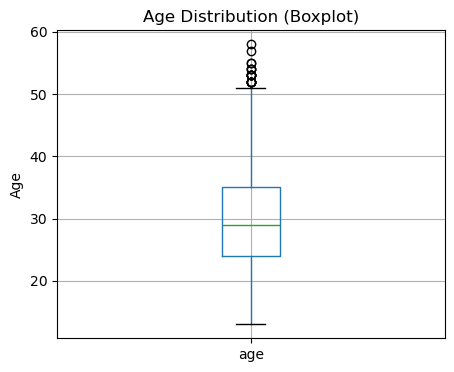

In [285]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
users[['age']].boxplot()
plt.title("Age Distribution (Boxplot)")
plt.ylabel("Age")
plt.show()


- Most of the users aged between 20 - 35 who are called as Teen agers.

## VISUALIZATION CODES (10 TOTAL)
- USERS DATASET VISUALIZATIONS

In [275]:
def add_bar_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, padding=3)


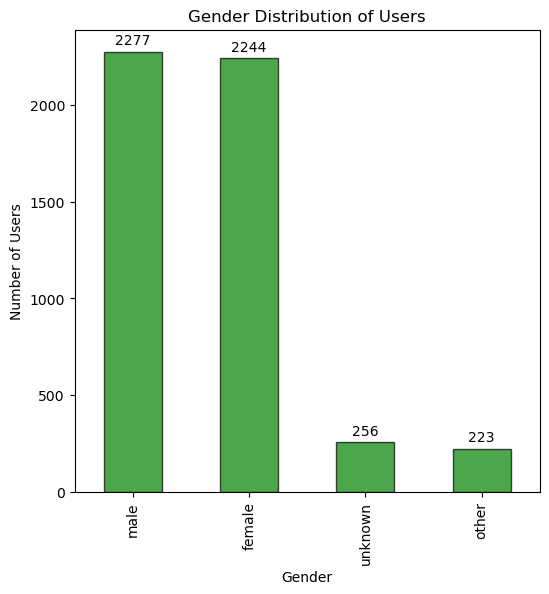

In [271]:
fig, ax = plt.subplots(figsize=(6,6))

users['gender'].value_counts().plot(kind='bar', ax=ax,color = 'green',edgecolor = 'black',alpha = 0.7)

ax.set_title("Gender Distribution of Users")
ax.set_xlabel("Gender")
ax.set_ylabel("Number of Users")

add_bar_labels(ax)
plt.show()


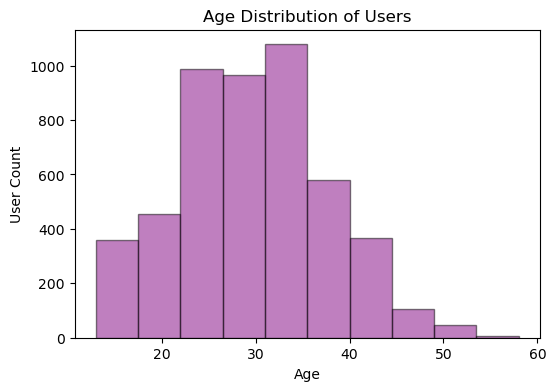

In [242]:
plt.figure(figsize=(6,4))
plt.hist(users['age'].dropna(), bins=10,color = 'purple', edgecolor = 'black',alpha = 0.5)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("User Count")
plt.show()

### Product recommendation:
> Optimize UI design, content style, and feature complexity to suit the dominant age group, while optionally introducing accessibility or customization options for older users.

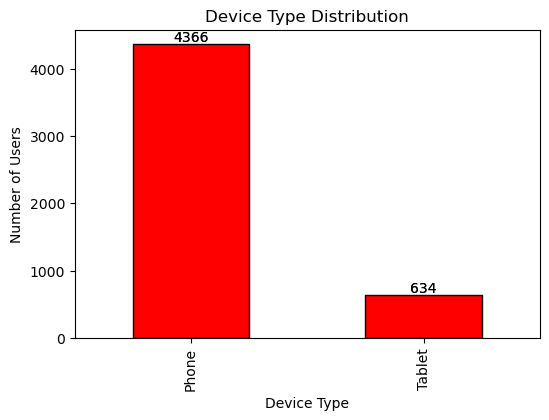

In [245]:
plt.figure(figsize=(6,4))
users['device_type'].value_counts().plot(kind='bar')
ax = users['device_type'].value_counts().plot(
    kind='bar',
    edgecolor='black',
    color = 'red'
)

for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom'
    )

# plt.show()

plt.title("Device Type Distribution")
plt.xlabel("Device Type")
plt.ylabel("Number of Users")
plt.show()

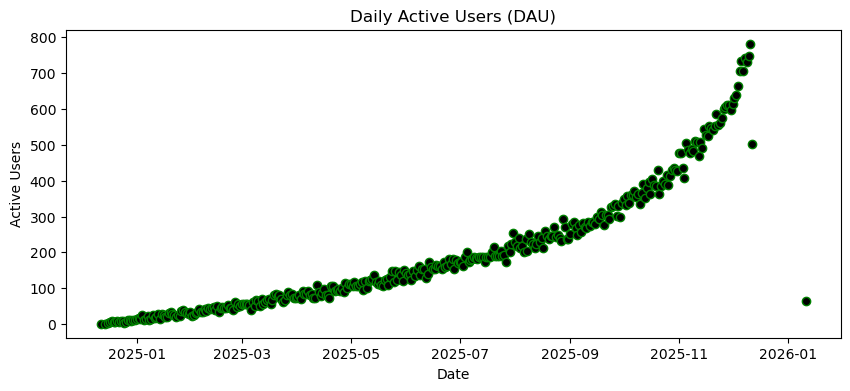

In [247]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(dau.index, dau.values, marker='o',color='white',
    linestyle='--',         # dashed line
    linewidth=2,
    # marker='o',
    markersize=6,
    markerfacecolor='black',
    markeredgecolor='green')

ax.set_title("Daily Active Users (DAU)")
ax.set_xlabel("Date")
ax.set_ylabel("Active Users")


plt.show()


- DAU shows an overall increasing trend with minor fluctuations.

### Product Recommendation:
> Capitalize on growing daily engagement by introducing daily streaks, rewards, or time-bound challenges to maintain consistent daily usage.

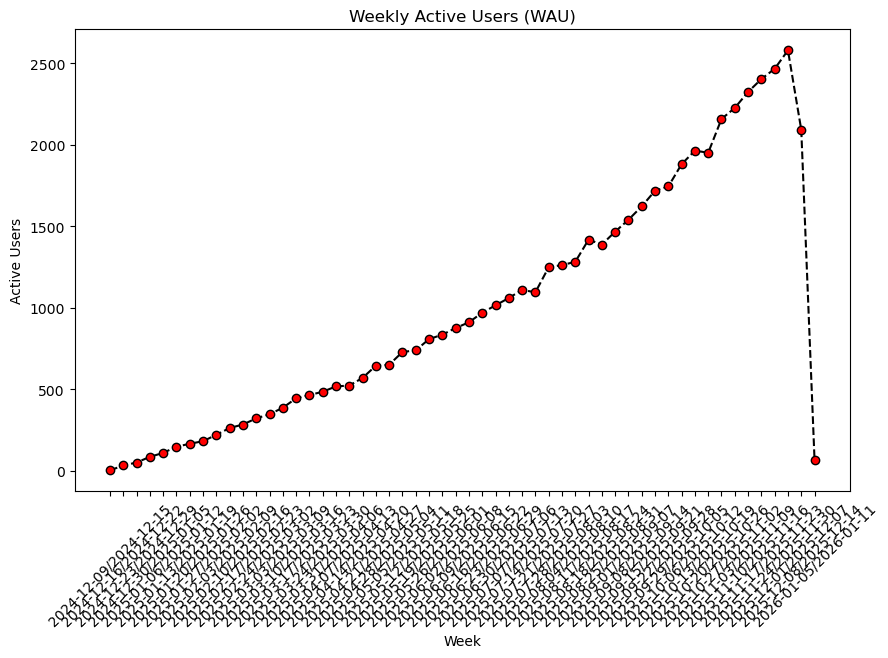

In [250]:
sessions['week'] = sessions['start_time'].dt.to_period('W')
wau = sessions.groupby('week')['user_id'].nunique()

plt.figure(figsize=(10,6))
plt.plot(wau.index.astype(str), wau.values,linestyle = '--',color = 'black',marker = 'o',markerfacecolor='red',
    markeredgecolor='black')
plt.title("Weekly Active Users (WAU)")
plt.xlabel("Week")
plt.ylabel("Active Users")
plt.xticks(rotation=45)
plt.show()


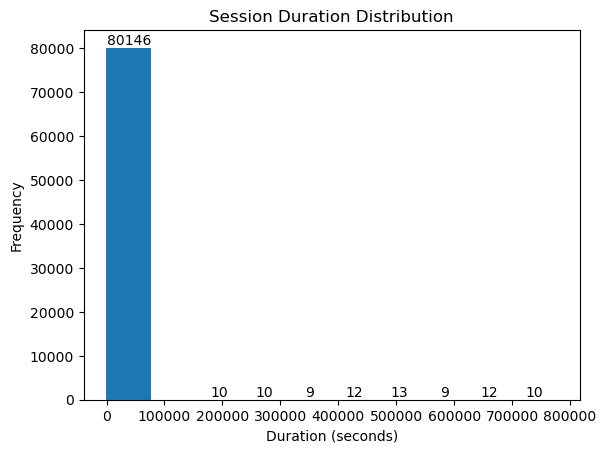

In [252]:
counts, bins, patches = plt.hist(sessions['duration_seconds'], bins=10)

for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(
            patch.get_x() + patch.get_width()/2,
            count,
            int(count),
            ha='center',
            va='bottom'
        )

plt.title("Session Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()


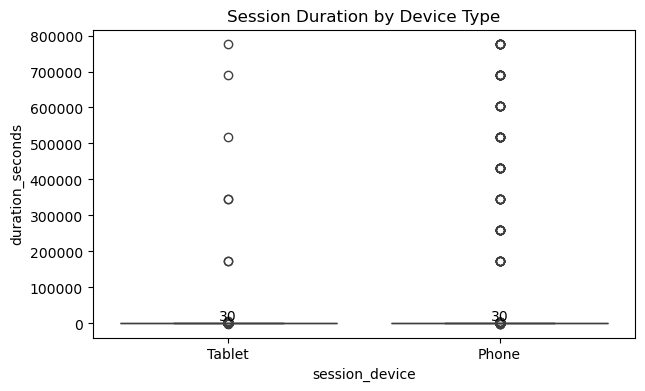

In [254]:
fig, ax = plt.subplots(figsize=(7,4))

sns.boxplot(x='session_device', y='duration_seconds', data=sessions, ax=ax)

medians = sessions.groupby('session_device')['duration_seconds'].median()

for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.0f}', ha='center', va='bottom')

ax.set_title("Session Duration by Device Type")
plt.show()


### Product recommendation:
> Since the majority of users access the app via mobile phones and mobile users show longer session durations, product improvements and performance optimizations should prioritize the mobile experience over tablets.

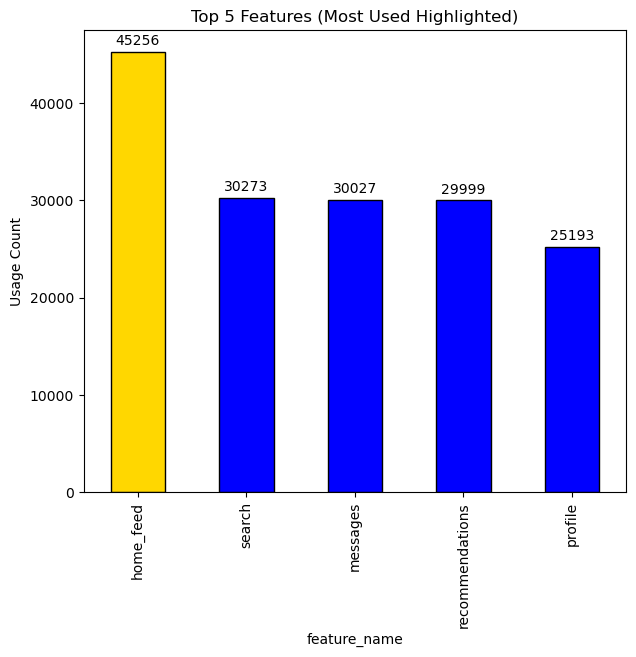

In [257]:
top_features = features['feature_name'].value_counts().head(5)

colors = ['gold' if i == 0 else 'blue' for i in range(len(top_features))]

fig, ax = plt.subplots(figsize=(7,6))
top_features.plot(
    kind='bar',
    color=colors,
    edgecolor='black',
    ax=ax
)

ax.set_title("Top 5 Features (Most Used Highlighted)")
ax.set_ylabel("Usage Count")

add_bar_labels(ax)
plt.show()


### Product Recommendation:
> Focus development and optimization efforts on these top-used features, ensuring high reliability and performance, while considering deprecating or redesigning low-usage features.

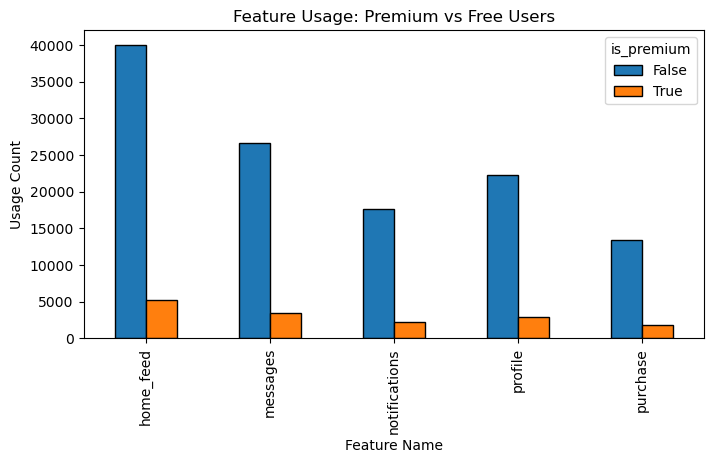

In [260]:
merged = features.merge( users[['user_id', 'is_premium']], on='user_id', how='left' ) 
feature_premium = pd.crosstab( merged['feature_name'], merged['is_premium'] ) 
feature_premium.head(5).plot(kind='bar', figsize=(8,4),edgecolor = 'black') 
plt.title("Feature Usage: Premium vs Free Users") 
plt.xlabel("Feature Name") 
plt.ylabel("Usage Count") 
plt.show()

### Product Recommendation:
> Premium users demonstrate consistently higher engagement across features. Offering time-limited premium trials or highlighting premium-only benefits can help convert active free users into paid subscribers.

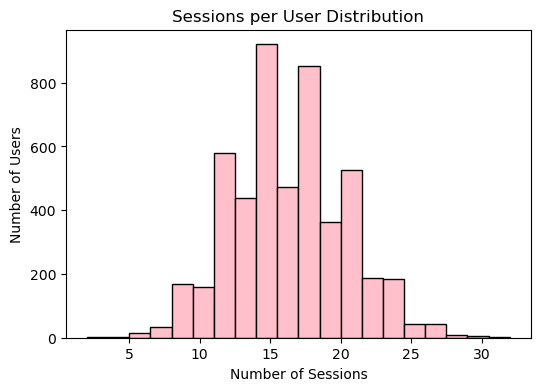

In [263]:
sessions_per_user = sessions.groupby('user_id')['session_id'].count()

plt.figure(figsize=(6,4))
plt.hist(sessions_per_user, bins=20,color = 'pink',edgecolor = 'black')
plt.title("Sessions per User Distribution")
plt.xlabel("Number of Sessions")
plt.ylabel("Number of Users")
plt.show()


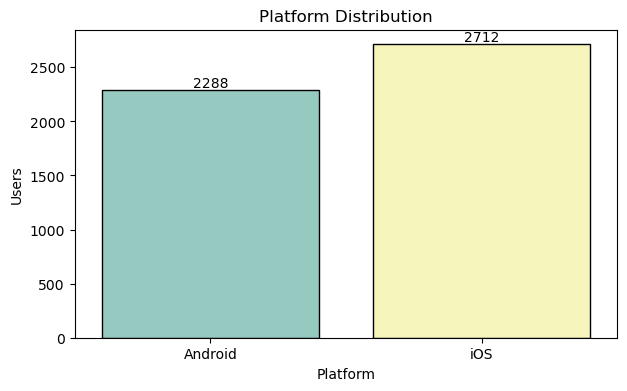

In [265]:
fig, ax = plt.subplots(figsize=(7,4))

sns.countplot(
    x='platform',
    hue='platform',     # assign x to hue
    data=users,
    palette='Set3',
    edgecolor='black',
    legend=False,
    ax=ax
)

ax.set_title("Platform Distribution")
ax.set_xlabel("Platform")
ax.set_ylabel("Users")

for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


### Key analysis
> The majority of users fall within the 20–35 age group, indicating a young user base.

> Mobile phone users dominate overall engagement compared to tablet users.

> Daily and weekly active users show a steady upward trend, indicating improving retention.

> Session durations are highly skewed, with a small group of users exhibiting very long sessions.

> Feature usage is concentrated around a few core features.

> Premium users show lower overall volume but stronger engagement per feature.

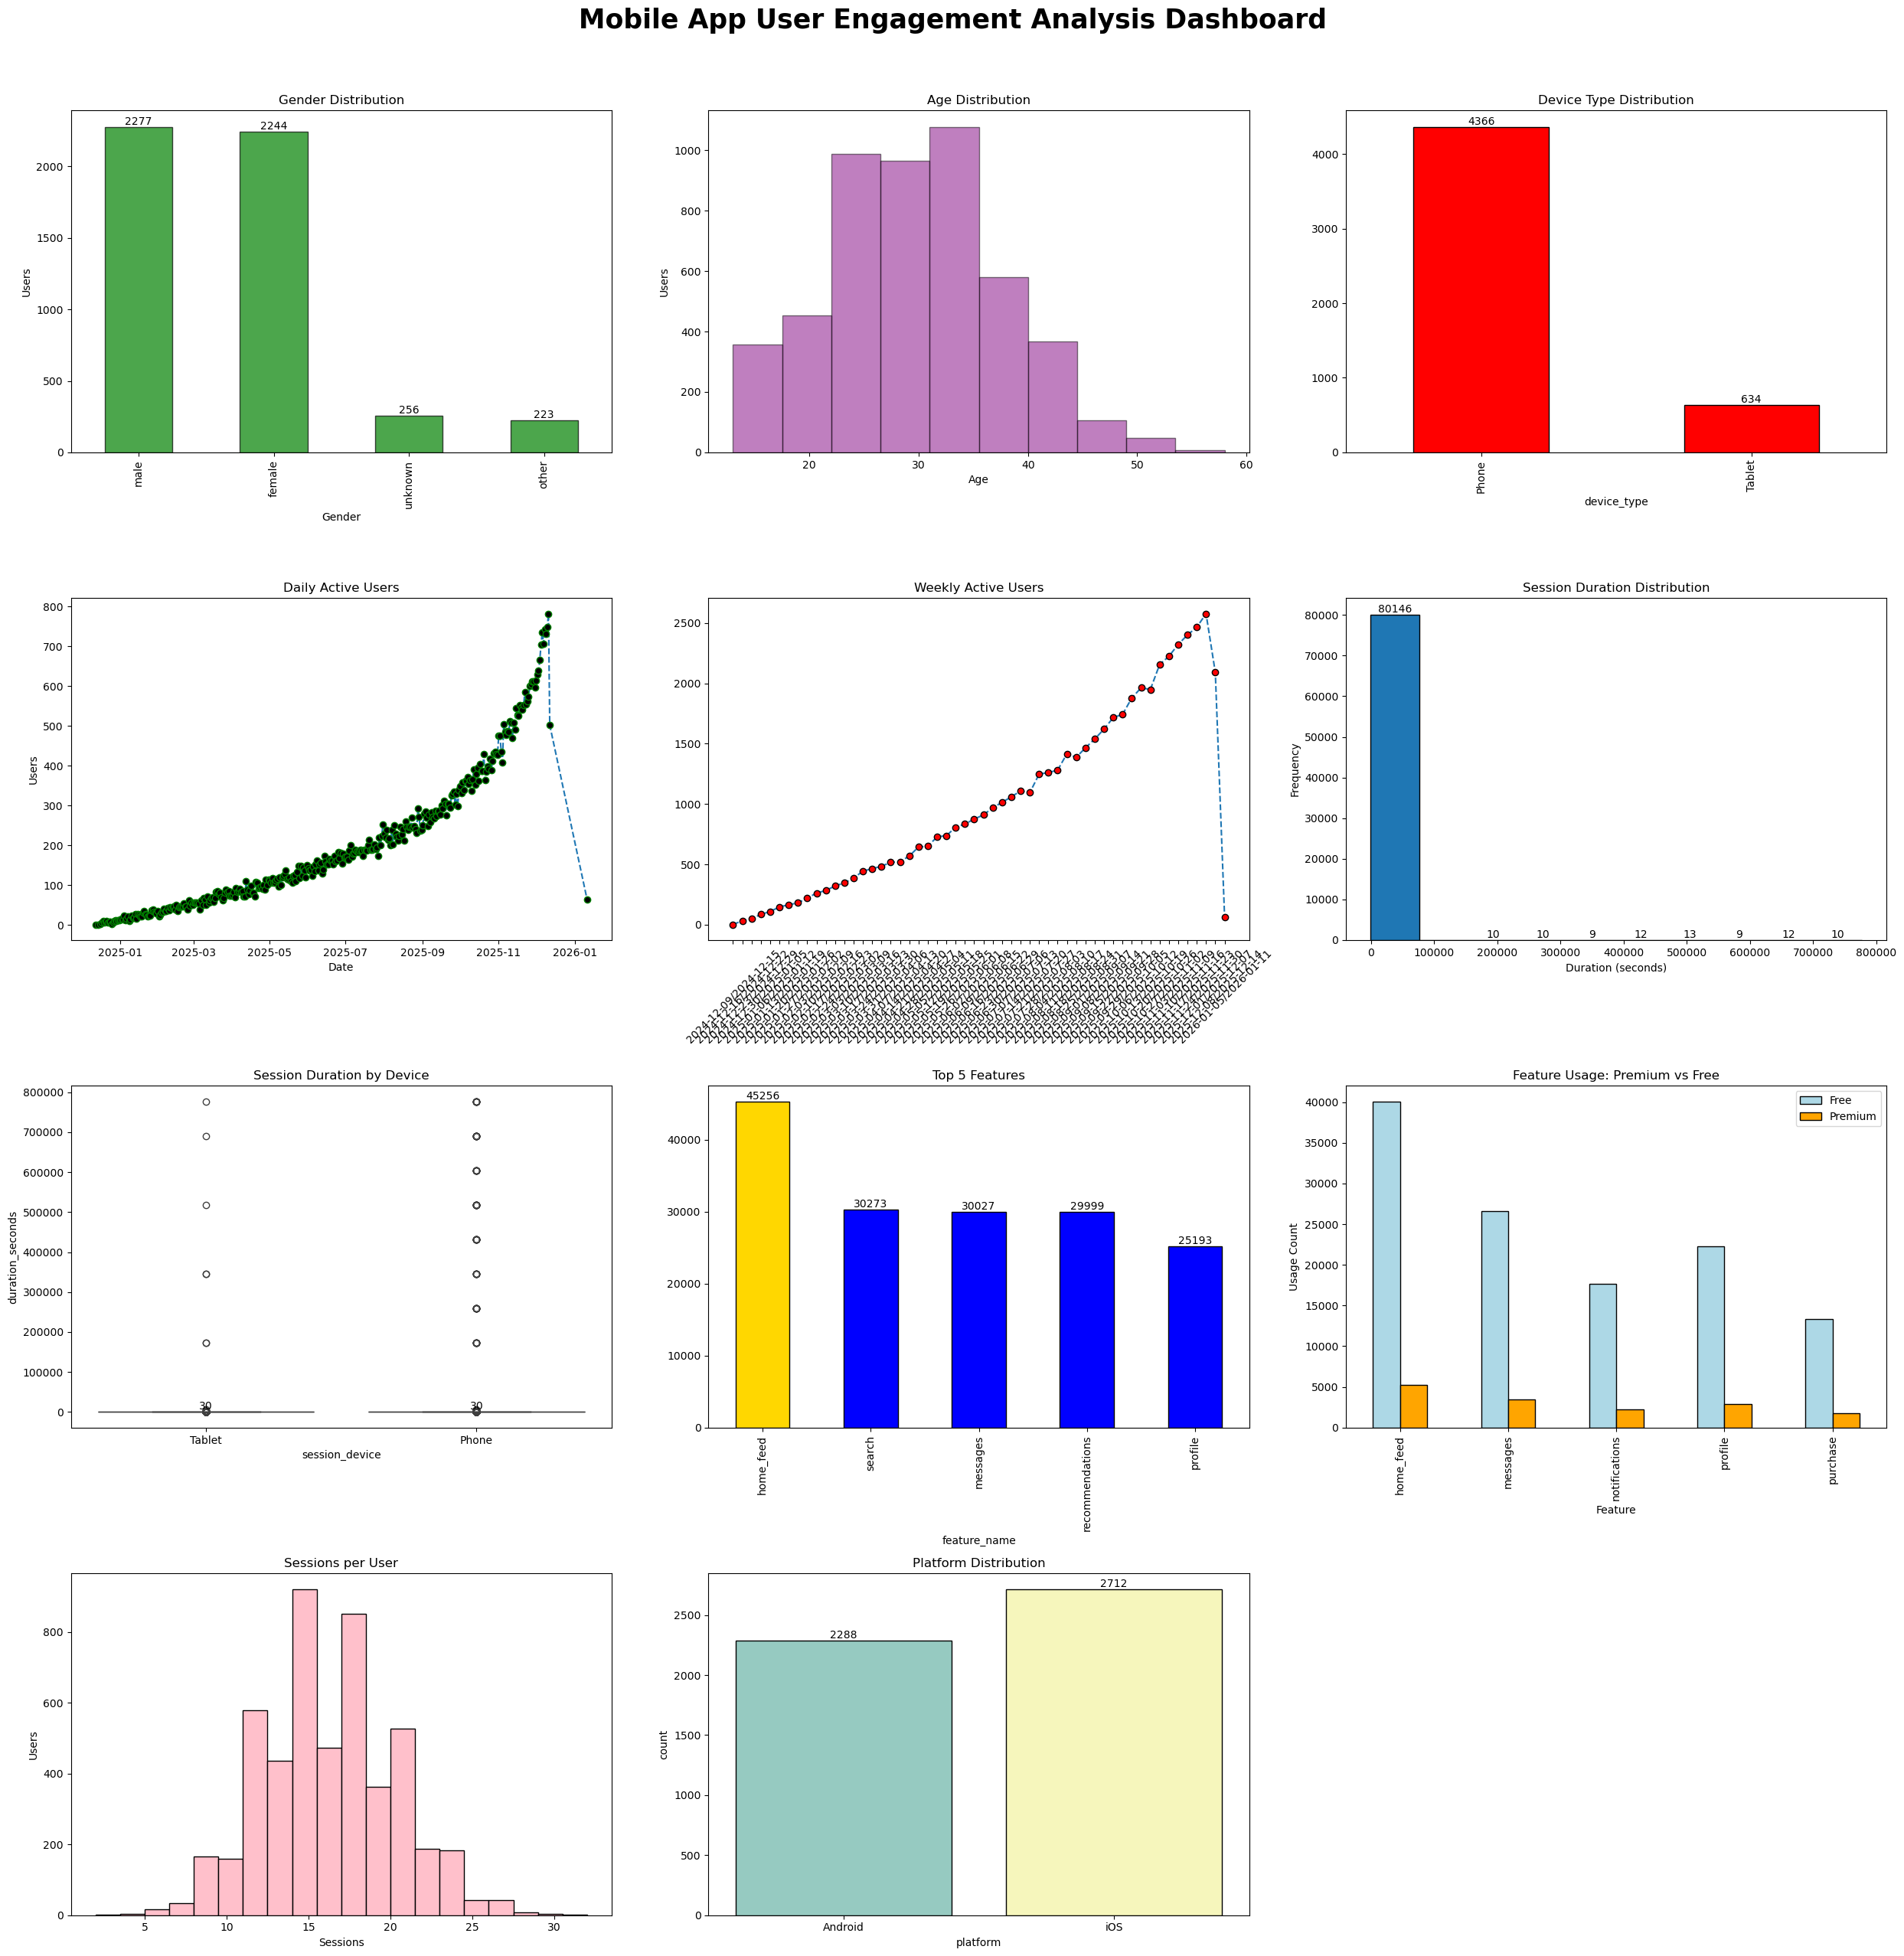

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# dashboard canvas
# -------------------------------
fig, axes = plt.subplots(4, 3, figsize=(25, 25))
axes = axes.flatten()

# -------------------------------
# 1. Gender Distribution
# -------------------------------
users['gender'].value_counts().plot(
    kind='bar', ax=axes[0],
    color='green', edgecolor='black', alpha=0.7
)
axes[0].set_title("Gender Distribution")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Users")

for p in axes[0].patches:
    axes[0].annotate(
        int(p.get_height()),
        (p.get_x()+p.get_width()/2, p.get_height()),
        ha='center', va='bottom'
    )

# -------------------------------
# 2. Age Distribution
# -------------------------------
axes[1].hist(
    users['age'].dropna(),
    bins=10, color='purple', edgecolor='black', alpha=0.5
)
axes[1].set_title("Age Distribution")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Users")

# -------------------------------
# 3. Device Type Distribution
# -------------------------------
users['device_type'].value_counts().plot(
    kind='bar', ax=axes[2],
    color='red', edgecolor='black'
)
axes[2].set_title("Device Type Distribution")

for p in axes[2].patches:
    axes[2].annotate(
        int(p.get_height()),
        (p.get_x()+p.get_width()/2, p.get_height()),
        ha='center', va='bottom'
    )

# -------------------------------
# 4. Daily Active Users (DAU)
# -------------------------------
axes[3].plot(
    dau.index, dau.values,
    linestyle='--', marker='o',
    markerfacecolor='black',
    markeredgecolor='green'
)
axes[3].set_title("Daily Active Users")
axes[3].set_xlabel("Date")
axes[3].set_ylabel("Users")

# -------------------------------
# 5. Weekly Active Users (WAU)
# -------------------------------
axes[4].plot(
    wau.index.astype(str), wau.values,
    linestyle='--', marker='o',
    markerfacecolor='red',
    markeredgecolor='black'
)
axes[4].set_title("Weekly Active Users")
axes[4].tick_params(axis='x', rotation=45)

# -------------------------------
# 6. Session Duration Distribution
# -------------------------------
counts, bins, patches = axes[5].hist(
    sessions['duration_seconds'],
    bins=10, edgecolor='black'
)

for c, p in zip(counts, patches):
    if c > 0:
        axes[5].text(
            p.get_x()+p.get_width()/2,
            c,
            int(c),
            ha='center',
            va='bottom'
        )

axes[5].set_title("Session Duration Distribution")
axes[5].set_xlabel("Duration (seconds)")
axes[5].set_ylabel("Frequency")

# -------------------------------
# 7. Session Duration by Device
# -------------------------------
sns.boxplot(
    x='session_device',
    y='duration_seconds',
    data=sessions,
    ax=axes[6]
)

medians = sessions.groupby('session_device')['duration_seconds'].median()
for i, m in enumerate(medians):
    axes[6].text(i, m, f'{int(m)}', ha='center', va='bottom')

axes[6].set_title("Session Duration by Device")

# -------------------------------
# 8. Top 5 Features
# -------------------------------
top_features.plot(
    kind='bar',
    ax=axes[7],
    color=['gold','blue','blue','blue','blue'],
    edgecolor='black'
)
axes[7].set_title("Top 5 Features")

for p in axes[7].patches:
    axes[7].annotate(
        int(p.get_height()),
        (p.get_x()+p.get_width()/2, p.get_height()),
        ha='center', va='bottom'
    )

# -------------------------------
# 9. Feature Usage: Premium vs Free
# -------------------------------
feature_premium.head(5).plot(
    kind='bar',
    ax=axes[8],
    color=['lightblue','orange'],
    edgecolor='black'
)
axes[8].set_title("Feature Usage: Premium vs Free")
axes[8].set_xlabel("Feature")
axes[8].set_ylabel("Usage Count")
axes[8].legend(["Free", "Premium"])

# -------------------------------
# 10. Sessions per User
# -------------------------------
axes[9].hist(
    sessions_per_user,
    bins=20,
    color='pink',
    edgecolor='black'
)
axes[9].set_title("Sessions per User")
axes[9].set_xlabel("Sessions")
axes[9].set_ylabel("Users")

# -------------------------------
# 11. Platform Distribution
# -------------------------------
sns.countplot(
    x='platform',
    hue='platform',
    data=users,
    palette='Set3',
    edgecolor='black',
    legend=False,
    ax=axes[10]
)

axes[10].set_title("Platform Distribution")

for p in axes[10].patches:
    axes[10].annotate(
        int(p.get_height()),
        (p.get_x()+p.get_width()/2, p.get_height()),
        ha='center', va='bottom'
    )

axes[11].axis('off')

fig.suptitle(
    "Mobile App User Engagement Analysis Dashboard",
    fontsize=25,
    fontweight='bold',
    y=1.02
)

plt.tight_layout()
plt.show()


### Conclusion:
- This analysis highlights strong mobile engagement, increasing user activity over time, and clear behavioral differences between free and premium users. The insights provide actionable directions for improving feature adoption, retention, and monetization.